# LastFM Dissertation Highlights

This notebook is an exploration of the different music I listened to while I worked on my dissertation. I listened to music a lot while reading and writing, and I was wondering what my influences were.

## Keys

I put the [LastFM API](https://www.last.fm/api) keys in my environment where I can import them.

In [1]:
import os
import dotenv

dotenv.load_dotenv()

LASTFM_KEY = os.environ['LASTFM_KEY']
LASTFM_SECRET = os.environ['LASTFM_SECRET']

## Test

First lets see if we can do *anything* with the API.

In [2]:
! pip install pylast

In [3]:
import pylast

lastfm = pylast.LastFMNetwork(api_key=LASTFM_KEY, api_secret=LASTFM_SECRET)
artist = lastfm.get_artist('Bob Dylan')

In [4]:
help(pylast)

Help on package pylast:

NAME
    pylast

DESCRIPTION
    # pylast -
    #     A Python interface to Last.fm and Libre.fm
    #
    # Copyright 2008-2010 Amr Hassan
    # Copyright 2013-2020 hugovk
    #
    # Licensed under the Apache License, Version 2.0 (the "License");
    # you may not use this file except in compliance with the License.
    # You may obtain a copy of the License at
    #
    #     https://www.apache.org/licenses/LICENSE-2.0
    #
    # Unless required by applicable law or agreed to in writing, software
    # distributed under the License is distributed on an "AS IS" BASIS,
    # WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
    # See the License for the specific language governing permissions and
    # limitations under the License.
    #
    # https://github.com/pylast/pylast

PACKAGE CONTENTS


CLASSES
    builtins.Exception(builtins.BaseException)
        MalformedResponseError
        NetworkError
        WSError
    builtins.object

In [5]:
for album in artist.get_top_albums():
    print(album.item.get_title())

Bob Dylan: The Collection


## My Listening Data

See if I can use the API to get my own listening data.

In [8]:
me = lastfm.get_user('inkdroid')
albums = me.get_top_albums()

In [9]:
help(me.get_top_albums)

Help on method get_top_albums in module pylast:

get_top_albums(period='overall', limit=None, cacheable=True) method of pylast.User instance
    Returns the top albums played by a user.
    * period: The period of time. Possible values:
      o PERIOD_OVERALL
      o PERIOD_7DAYS
      o PERIOD_1MONTH
      o PERIOD_3MONTHS
      o PERIOD_6MONTHS
      o PERIOD_12MONTHS



## Album Covers

What are the album covers for my top 25 albums from the last month?

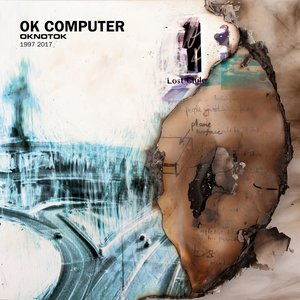

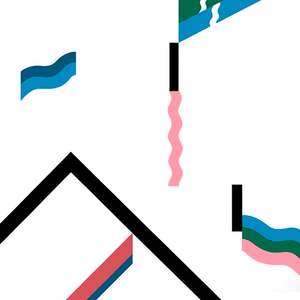

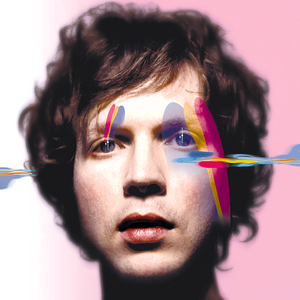

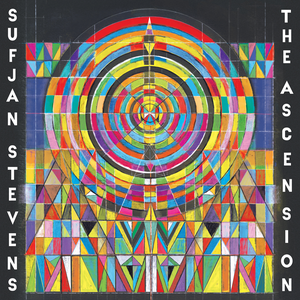

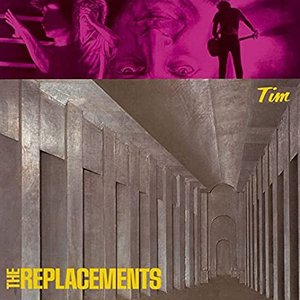

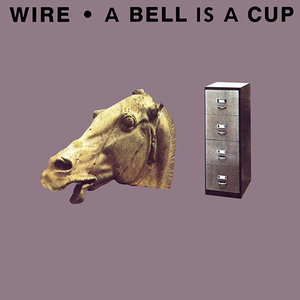

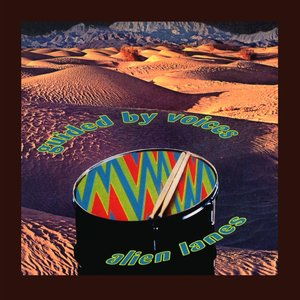

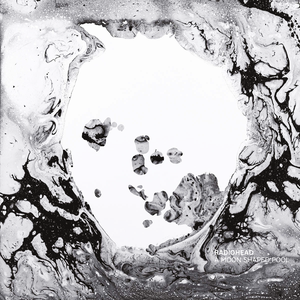

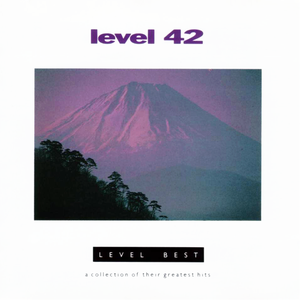

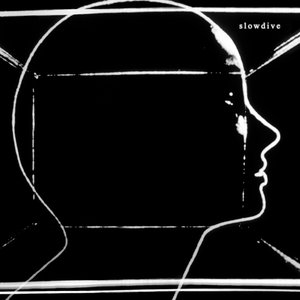

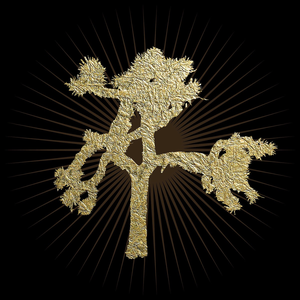

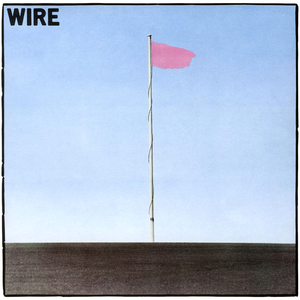

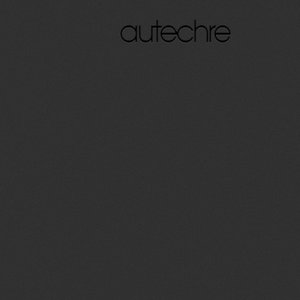

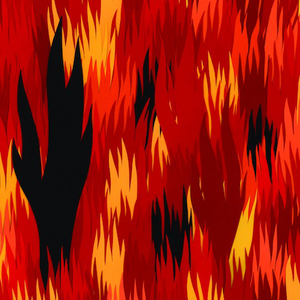

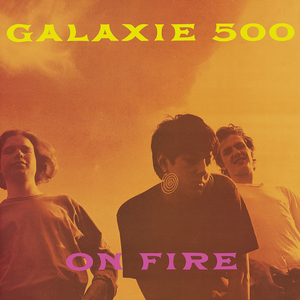

In [11]:
from IPython.display import Image, display

for album in me.get_top_albums(period=pylast.PERIOD_1MONTH, limit=25):
    title = album.item.get_title()
    plays = album.weight
    cover_url = album.item.get_cover_image()
    # uhoh not all these URLs are 200 OK!
    try:
        display(Image(cover_url, embed=True))
    except:
        pass